# **Data Preprocessing**


#### In the data preprocessing step, the dataset is cleaned to ensure that the data is ready for analysis ensuring data quality. Data pre-processing uses methods that guarantee the raw data is correct, harmonious, and in an easily analyzed format. It eliminates errors, sorts out missed values, and normalizes the data for comparability. Preprocessing basically increases interpretability by selecting or creating relevant features, decreases noise, hence reliable results, and compatibility with analytical models. Most importantly, it prepares the data to provide insight into business objectives, enhancing accuracy and efficiency in the analysis.

#### The dataset provided from the link includes data which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based non-store online retail.The company sells different all-occasion gifts and many customers of the company are wholesalers.

#### In this initial step, we imported the required libraries and than imported the dataset using pandas library. The data is named as 'df'. The 'head()' function returns first few rows of the dataset.


In [10]:
#importing the required libraries 

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [13]:
#loading the dataset 
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

# Display the first few rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 1. Data Overview



#### We displayed the number of rows and columns in the dataset using 'shape'

In [19]:
# Displaying the number of rows and columns

print("The number of rows in the Dataset", df.shape[0])
print("The number of columns in the Dataset", df.shape[1])

The number of rows in the Dataset 541909
The number of columns in the Dataset 8



#### We obtained a statistical summary of the dataset using the 'describe ()' function




In [23]:
#Summary of the dataset

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### We used 'info()' to print a concise summary of a DataFrame which prints s index dtype and columns, non-null values and memory usage.

In [30]:
#concise summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### we provided a statistical summary of all object-type columns (for categorical data) in the DataFrame, and then transposed the result for better readability

In [36]:
# Summary statistics for categorical variables

df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


#### The code snippet ‘df.isnull().sum()’ executed on the DataFrame checks for null (or missing) values across all columns. 

In [43]:
# to identify and count the number of missing (null or NaN) values in each column

missing_data = df.isnull().sum()
missing_data


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### The code snippet calculates the percentage of missing values for each column, but only for the columns with missing values

In [46]:
# to calculate the percentage of missing values in each column 

missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

missing_percentage

Description     0.268311
CustomerID     24.926694
dtype: float64

#### The code displays the rows with missing values in CustomerID column and Description columns

In [49]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns

df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


#### Now we have handled the missing values. The rows with missing values are dropped in CustomerID and Description Column 

In [55]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns

df = df.dropna(subset=['CustomerID', 'Description'])

#### we displayed the number of rows and columns after data cleaning 

In [58]:
#displaying the number of rows and columns 

df.shape

(406829, 8)

#### After data cleaning, we check whether the dataset is free of missing values. Handling missing values is essential because they can mess up your analysis and lead to wrong conclusions. If left unchecked, they can distort calculations, confuse your results, and even cause errors in machine learning models. By addressing missing values—either by removing them or filling them in—you ensure your data is accurate, reliable, and ready for analysis. It also helps models perform better and ensures your insights and decisions are based on clean, meaningful data.

In [61]:
# Verifying the removal of missing values

df.isnull().sum().sum()

0

### Handling the Duplicate data 

#### Duplicate data happens when the same information appears more than once in your dataset. If not handled, it can skew your results, slow down processing, and lead to misleading insights. To fix this, you first check for duplicates, count how many there are, and then decide how to handle them—usually by removing them with tools like drop_duplicates() in pandas. You can choose to keep the first, last, or only unique rows, depending on your needs. Cleaning duplicates helps make your data more accurate, efficient, and reliable for analysis.

#### We have found the duplicate rows and sorted the duplicate rows to make the data readable. Then the duplicate rows are displayed. 

In [63]:
# Finding duplicate rows (keeping all instances)

duplicate_rows = df[df.duplicated(keep=False)]


# Sorting the data by certain columns to see the duplicate rows next to each other

duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])


# Displaying the first 10 records

duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


#### The duplicate rows are removed enhancing the quality of data

In [66]:
# Removing duplicate rows


df.drop_duplicates(inplace=True)

#### we displayed the number of rows and columns after handling duplicate data 

In [73]:
#displaying the number of rows and columns 

df.shape

(401604, 8)

#### The importance of a cleaned dataset: Having a cleaned dataset makes everything easier and more reliable. It ensures that your analysis or models are based on accurate data, leading to better results and predictions. With clean data, your work becomes more efficient, faster, and trustworthy, helping you make smarter decisions. It also reduces the risk of errors and biases, making sure that your insights are clear and meaningful. Whether you’re working with large datasets or creating visualizations, cleaning your data sets the foundation for success.


#### The "head()" function was used to display the first few rows of the cleaned dataset, offering a glimpse of the data's structure and content after removing duplicates.

In [79]:
# displaying the first few rows of the cleaned dataset 

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 2. Customer Analysis

#### To determine the count of unique customers in the dataset, the nunique() method was applied to the CustomerID column. The result, stored in unique_customers, represents the distinct number of customers present in the dataset. 

#### Q 1. Count the number of unique customers

#### The code df["CustomerID"].nunique() counts the number of unique customer IDs in the CustomerID column of the DataFrame. The result is stored in the variable unique_customers, and then printed out to show how many unique customers are in the dataset.
 


In [124]:
# Q 1. Count the number of unique customers

unique_customers = df['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")



Number of unique customers: 4372


#### Q 2. Distribution of the number of orders per customer

#### The code counts the number of orders made by each customer (df['CustomerID'].value_counts()), and then provides a summary of this distribution using descriptive statistics (describe()), such as the average number of orders, minimum, maximum, and percentiles. This helps you understand how orders are spread across customers, identify trends, and spot high-value or frequent customers. It’s useful for analyzing customer behavior and planning marketing or sales strategies.

In [126]:
# Q 2. Distribution of the number of orders per customer

orders_per_customer = df['CustomerID'].value_counts()
print("\nDistribution of orders per customer:")
print(orders_per_customer.describe())




Distribution of orders per customer:
count    4372.000000
mean       91.858188
std       229.223566
min         1.000000
25%        17.000000
50%        41.000000
75%        99.250000
max      7812.000000
Name: count, dtype: float64


#### Insights by observing the above desciption:

#### The data shows that most customers make between 1 and 3 purchases, with the average being 1.8 orders. A quarter of customers made only 1 order, while half made 2 orders, and three-quarters made up to 3 orders. The variation in the number of orders is relatively low, suggesting that while most customers buy only a few times, there’s some difference in how often customers return. This indicates an opportunity to encourage repeat purchases, especially from customers who have made only one order.ases.


#### # Q 3. Top 5 customers with the most purchases by order count

#### The code retrieves the top 5 customers who have made the most purchases by using `orders_per_customer.head(5)`. This extracts the first 5 entries from the `orders_per_customer` Series, which is already sorted in descending order by the number of orders. Then, it prints these top 5 customers along with their order counts. This helps identify your most active or valuable customers.

In [162]:
# Q 3. Top 5 customers with the most purchases by order count

top_customers = orders_per_customer.head(5)
print("\nTop 5 customers with the most purchases:")
print(top_customers)


Top 5 customers with the most purchases:
CustomerID
17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
Name: count, dtype: int64


#### Visualising the top 5 customers with most purchases by count 
#### The chart displays the CustomerID on the y-axis and the Number of Orders on the x-axis. Each customer will have a horizontal bar whose length corresponds to the number of orders they made.


#### This horizontal bar chart shows the top 5 customers with the most orders. The longer the bar, the more orders that customer has made.
#### From this chart, you can quickly compare how many orders each of these top 5 customers has placed, with CustomerID 17841 having made the most orders (7812 orders).







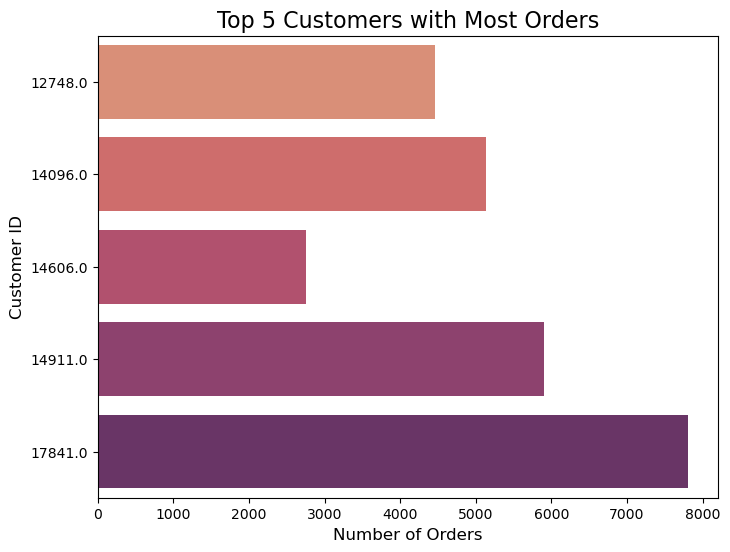

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# plotting Horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='flare', orient='h')
plt.title('Top 5 Customers with Most Orders', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.show()


### 3. Product Analysis


#### Q. 1 What are the top 10 most frequently purchased products?
#### We sorted the dataset by 'StockCode' and computed the total of 'Quantity' for each product to identify the top 10 most often bought items. The products with the largest total quantities bought were identified by sorting the resulting series, "top_products," in descending order. This data is useful for managing inventories and determining which products are in high demand.

In [176]:
# Q 1. Top 10 most frequently purchased products

top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 most frequently purchased products:")
print(top_products)


Top 10 most frequently purchased products:
StockCode
84077     53119
22197     48689
85099B    44963
84879     35215
85123A    34185
21212     33386
23084     27045
22492     25880
22616     25305
21977     24129
Name: Quantity, dtype: int64


##### Q. 2 What is the average price of products in the dataset?

#### The code calculates the average product price from the 'UnitPrice' column and displays it in a formatted way, rounding the result to two decimal places. This helps in understanding the typical cost of products in the dataset.

In [179]:
# 2. Average price of products

average_price = df['UnitPrice'].mean()
print(f"\nAverage price of products: ${average_price:.2f}")




Average price of products: $3.47


#### Q.3 Can you find out which product category generates the highest revenue?

#### The code calculates the product with the highest revenue by using the columns 'UnitPrice' and 'Quantity' in the dataset, then groups the data by product description to determine which product generates the most revenue. We found that Product "REGENCY CAKESTAND 3 TIER" is highest revenue 

In [184]:
# 3. Revenue by Product (Total Revenue for each product)

df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
revenue_by_product = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)
top_product = revenue_by_product.head(1)
print(f"\nProduct with Highest Revenue: {top_product}")


Product with Highest Revenue: Description
REGENCY CAKESTAND 3 TIER    132567.7
Name: TotalPrice, dtype: float64


# **RFM CALCULATIONS**


#### **RFM** (Recency, Frequency, Monetary) analysis is a customer segmentation technique that helps businesses understand customer behavior based on three key metrics: Recency, Frequency, and Monetary value. The terms are explained below: 

#### 1.**Recency:** Recency is about how fresh or recent a customer's relationship is with your business. The more recent their last purchase, the more likely they are to make another one, making them a top priority for marketing or sales strategies.
#### 2.**Frequency:** Frequency is all about how often a customer comes back to buy from your business. The more often they buy, the more valuable they are as a loyal customer, and businesses can focus on keeping those frequent buyers happy while encouraging less frequent customers to come back more often.
#### 3.**Monetary:** Monetary is about how much money a customer spends. The more they spend, the more valuable they are to your business. By focusing on these high-spending customers, businesses can maximize their revenue and create strategies to keep them happy and buying more.

#### **Receny Calculation:**

#### The code first converts the 'InvoiceDate' column in the DataFrame df to a datetime format. This is important because dates stored as strings won’t allow you to perform date arithmetic (like subtracting one date from another). Converting to datetime enables proper date operations.
#### Then current_date is set to the most recent purchase date in the dataset, i.e., the latest date found in the 'InvoiceDate' column. This is used to calculate the Recency for each customer by comparing their last purchase date to this reference date.
#### groupby('CustomerID'): This groups the data by CustomerID, meaning we are calculating recency for each customer individually.
#### x.max(): For each customer, x.max() gets the most recent purchase date, which is the latest InvoiceDate for that particular customer.
#### (current_date - x.max()).days: This calculates the difference between the current_date (or latest date in the dataset) and the most recent purchase date (x.max()), returning the result in days.
#### .transform(): This ensures that the calculation of recency is applied to the entire group of rows belonging to each customer. As a result, each customer will have the same Recency value in all their rows (since it’s based on their most recent purchase date).
#### The 'Recency' column in the DataFrame will contain the number of days since the most recent purchase for each customer.

In [223]:

#Recency (R): How recently a customer made a purchase. Calculate the number of days since the customer's last purchase

# Calculating the most recent date in the dataset
most_recent_date = df['InvoiceDate'].max()

# Calculating the difference between the order date and the most recent date
df['DaysSinceLastPurchase'] = \
(most_recent_date - df.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

recency_df = df.groupby('CustomerID')['DaysSinceLastPurchase'].min().reset_index()

recency_df.head()


,CustomerID,DaysSinceLastPurchase
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


#### **Frequency Calculation:**

#### The total number of unique orders made by each customer is represented by 'InvoiceNo'. 
#### The code df.groupby('CustomerID') groups the data by CustomerID, which means the calculation will be done for each customer separately.
#### nunique() counts how many unique InvoiceNo (order numbers) each customer has. Each customer can place multiple orders and we want to count how many distinct orders (invoices) the customer has made.
#### reset_index() is used to reset the index of the resulting DataFrame, turning the CustomerID back into a regular column. name='Frequency' assigns a new name to the column that holds the total number of unique orders for each customer. The result is stored in a new column called Frequency.

In [227]:

#Frequency (F): How often a customer makes a purchase. Calculate the total number of orders for each customer

frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

frequency_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


#### **Monetary Calculation:** 

#### The total monetary value of each customer's purchases is obtained by summing up their total spending. 
#### df['total_spend'] = df['Quantity'] * df['UnitPrice'] creates a new column called 'total_spend' in the DataFrame df. Quantity refers to how many items were purchased in a particular transaction, and UnitPrice refers to the price of a single item. By multiplying Quantity by UnitPrice, we get the total value (or total spending) for each individual transaction.
#### groupby('CustomerID'): This groups the data by CustomerID, meaning the total spending calculation will be done for each customer separately.['total_spend'].sum(): This sums the total_spend values for each customer across all their transactions. reset_index(name='Monetary'): After grouping and summing, the CustomerID column is used as the index. This step resets the index and assigns a name to the resulting column, which is Monetary (representing the total money spent by each customer).
#### The Final Result includes Monetary column.

In [231]:

#Monetary (M): The total monetary value of a customer's purchases. Calculate the sum of the total price for each customer

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary_df = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

monetary_df.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


#### The below code merges the Frequency, Monetary, and Recency data for each customer into a single DataFrame called RFM. This DataFrame provides a comprehensive view of each customer's behavior: how often they buy (Frequency), how much they spend (Monetary), and how recently they purchased (Recency). This RFM data is crucial for segmenting customers and developing targeted marketing strategies

In [235]:
#Merging Recency, Frequency and Monetary values into a single dataframe  

RFM = frequency.merge(monetary, on='CustomerID').merge(df[['CustomerID', 'Recency']].drop_duplicates(), on='CustomerID')

RFM

,CustomerID,Frequency,Monetary,Recency
0,12346.0,2,0.00,325
1,12347.0,7,4310.00,1
2,12348.0,4,1797.24,74
3,12349.0,1,1757.55,18
4,12350.0,1,334.40,309
...,...,...,...,...
4367,18280.0,1,180.60,277
4368,18281.0,1,80.82,180
4369,18282.0,3,176.60,7
4370,18283.0,16,2045.53,3


# **RFM SEGMENTATION**

#### In this, each customer gets a score for these three measures. These scores are combined into a "RFM score," which gives a snapshot of the customer’s behavior.

#### Once the scores are assigned, customers are grouped into segments. 
#### Best Customers: High recency, high frequency, high spending.
#### Loyal Customers: Buy often and spend well, but maybe haven’t bought recently.
#### At-Risk Customers: Used to spend a lot but haven’t bought anything in a while.
#### Using these segments, businesses can send personalized offers, reward loyal customers, or try to win back those who’ve stopped buying. It’s an easy way to focus on the right customers and make smarter marketing decisions.


#### The recency_df includes a new column R_Score that assigns a score of 1 (lowest) to 4 (highest) to each customer based on how recent their last purchase was.
#### This code calculates a Recency Score for customers, where higher scores (like 4) indicate more recent purchases and lower scores (like 1) indicate purchases made longer ago. 

In [251]:
# Assigning R, F and M scores for each customer from their respective Data Frames

recency_df.sort_values(by= ['DaysSinceLastPurchase'], ascending = True, inplace = True)
recency_df['R_Score'] = pd.qcut(recency_df['DaysSinceLastPurchase'], q=[0, 0.25, 0.5, 0.75, 1], labels=False,\
                                duplicates = 'drop') + 1
recency_df['R_Score'].fillna(0.0, inplace = True)

recency_df

,CustomerID,DaysSinceLastPurchase,R_Score
3784,17491.0,0,1
579,13102.0,0,1
3392,16933.0,0,1
524,13026.0,0,1
1649,14569.0,0,1
...,...,...,...
4212,18074.0,373,4
359,12791.0,373,4
4096,17908.0,373,4
3129,16583.0,373,4


#### The frequency_df now includes a new column F_Score, assigning scores of 1 (low frequency) to 4 (high frequency) to each customer. 

In [254]:
frequency_df.sort_values(by= ['Frequency'], ascending = False, inplace = True)
frequency_df['F_Score'] = pd.qcut(frequency_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=False, duplicates='drop') + 1

frequency_df

,CustomerID,Frequency,F_Score
1895,14911.0,248,3
330,12748.0,224,3
4042,17841.0,169,3
1674,14606.0,128,3
568,13089.0,118,3
...,...,...,...
4139,17967.0,1,1
173,12561.0,1,1
494,12984.0,1,1
175,12564.0,1,1


#### The monetary_df now includes a new column M_Score, assigning scores from 1 (low spending) to 4 (high spending) for each customer.

In [257]:
monetary_df.sort_values(by= ['Monetary'], ascending = False, inplace = True)
monetary_df['M_Score'] = pd.qcut(monetary_df['Monetary'], q=[0, 0.25, 0.5, 0.75, 1], labels=False, duplicates='drop') + 1

monetary_df

,CustomerID,Monetary,M_Score
1703,14646.0,279489.02,4
4233,18102.0,256438.49,4
3758,17450.0,187322.17,4
1895,14911.0,132458.73,4
55,12415.0,123725.45,4
...,...,...,...
125,12503.0,-1126.00,1
3870,17603.0,-1165.30,1
1384,14213.0,-1192.20,1
2236,15369.0,-1592.49,1


#### This code combines the R (Recency), F (Frequency), and M (Monetary) scores into a single RFM Score for each customer

In [262]:
# Combining the R, F and M scores to create a single score
# The formula used to combine these scores : R * 100 + F * 10 + M

rfm_scores = pd.merge(recency_df[['CustomerID', 'R_Score']], frequency_df[['CustomerID', 'F_Score']], on='CustomerID')
rfm_scores = pd.merge(rfm_scores, monetary_df[['CustomerID', 'M_Score']], on='CustomerID')

rfm_scores['RFM_Score'] = rfm_scores['R_Score'] * 100 + rfm_scores['F_Score'] * 10 + rfm_scores['M_Score']
rfm_scores

,CustomerID,R_Score,F_Score,M_Score,RFM_Score
0,17491.0,1,3,4,134
1,13102.0,1,3,4,134
2,16933.0,1,2,2,122
3,13026.0,1,3,3,133
4,14569.0,1,1,1,111
...,...,...,...,...,...
4367,18074.0,4,1,2,412
4368,12791.0,4,1,1,411
4369,17908.0,4,1,1,411
4370,16583.0,4,1,1,411


# **CUSTOMER SEGMENTATION** 

#### Customer segmentation is the process of dividing a customer base into smaller, more manageable groups or segments based on similar characteristics, behaviors, or preferences. The goal is to understand and cater to the needs of each segment more effectively. For example, you can group customers by age, location, buying behavior, or loyalty.

#### In the context of RFM analysis, segmentation helps businesses identify and target specific customer groups, such as: Loyal customers (frequent and high spenders), Potential churners (haven’t purchased recently), Big spenders, or New customers.

#### Customer segmentation with RFM clustering using K-Means organizes customers into groups based on their recency, frequency, and spending habits. The K-Means algorithm identifies patterns in the RFM data and forms clusters, like loyal customers or at-risk customers. Businesses can use these clusters to create tailored strategies to retain customers, improve engagement, and increase revenue.


#### This code segments customers based on their RFM scores using K-Means clustering. First, it processes RFM data, scales it, and determines the ideal cluster count using the Elbow Method and Silhouette Scores. Then, it applies K-Means with the best cluster number, grouping customers based on similar purchase behaviors. The clusters are analyzed for insights, like average R, F, and M scores, to label customers (e.g., loyal, at-risk). Finally, visualizations (2D/3D) make patterns clear, and customers are labeled with their respective clusters. 

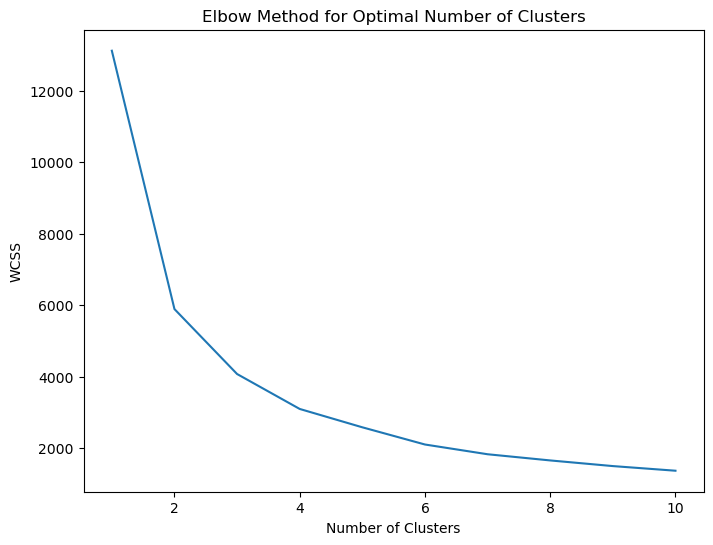

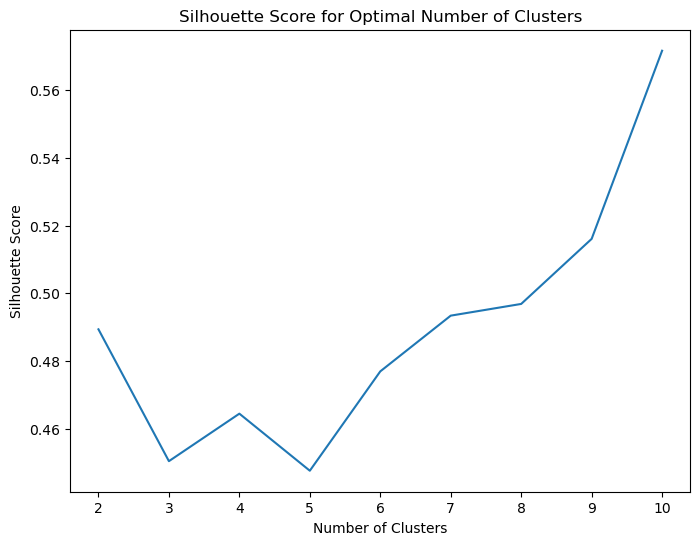

Cluster Summary:
           R_Score   F_Score   M_Score
Cluster                              
0        1.563613  1.096692  1.718830
1        1.533125  2.826968  3.701481
2        3.626142  1.031623  1.447646
3        2.854545  1.425000  3.147727


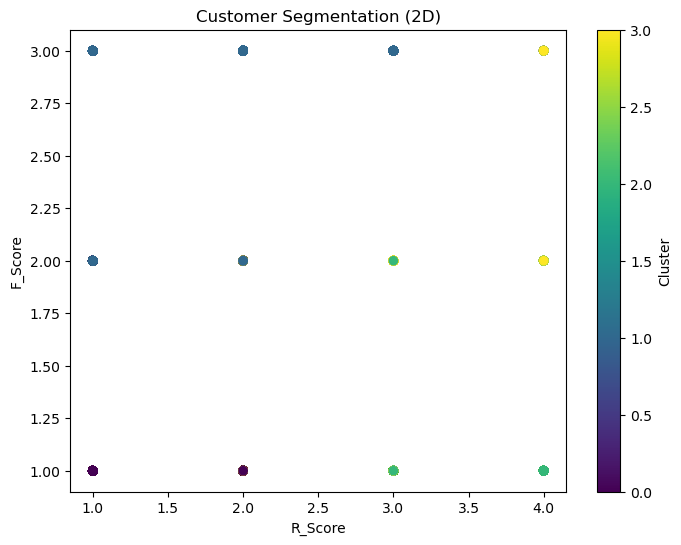

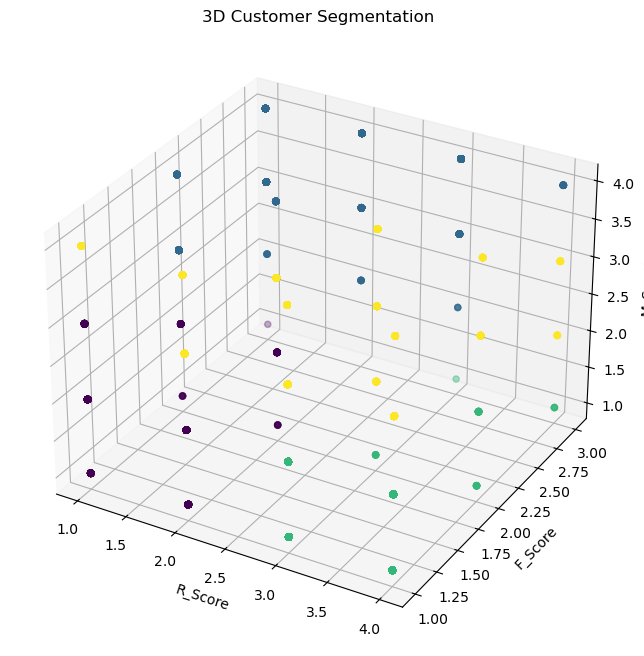

   CustomerID  R_Score  F_Score  M_Score  Cluster
0     17491.0        1        3        4        1
1     13102.0        1        3        4        1
2     16933.0        1        2        2        0
3     13026.0        1        3        3        1
4     14569.0        1        1        1        0


In [268]:
#CUSTOMER SEGMENTATION

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Step 1: Convert RFM scores to numeric values
rfm_scores['R_Score'] = rfm_scores['R_Score'].astype(int)
rfm_scores['F_Score'] = rfm_scores['F_Score'].astype(int)
rfm_scores['M_Score'] = rfm_scores['M_Score'].astype(int)

# Step 2: Prepare the data for clustering (select RFM columns)
rfm_for_clustering =  rfm_scores[['R_Score', 'F_Score', 'M_Score']]

# Step 3: Standardize the data (scaling)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_clustering)

# Step 4: Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):  # Trying 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 5: Silhouette Score to evaluate clustering quality
sil_scores = []
for i in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    sil_score = silhouette_score(rfm_scaled, kmeans.labels_)
    sil_scores.append(sil_score)

# Plot Silhouette Score graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Step 6: Apply K-Means clustering with the optimal number of clusters (e.g., 4)
optimal_clusters = 4  # Replace with the optimal number based on your elbow/silhouette analysis
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
rfm_scores['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 7: Analyze the clusters (average RFM values per cluster)
cluster_summary = rfm_scores.groupby('Cluster')[['R_Score', 'F_Score', 'M_Score']].mean()
print("Cluster Summary:\n", cluster_summary)

# Step 8: Visualizing the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(rfm_scores['R_Score'], rfm_scores['F_Score'], c=rfm_scores['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (2D)')
plt.xlabel('R_Score')
plt.ylabel('F_Score')
plt.colorbar(label='Cluster')
plt.show()

# Step 9:3D visualization (using R, F, and M scores)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_scores['R_Score'], rfm_scores['F_Score'], rfm_scores['M_Score'], c=rfm_scores['Cluster'], cmap='viridis')
ax.set_xlabel('R_Score')
ax.set_ylabel('F_Score')
ax.set_zlabel('M_Score')
plt.title('3D Customer Segmentation')
plt.show()

# Step 10: Display the final DataFrame with CustomerID and their assigned Cluster
print(rfm_scores[['CustomerID', 'R_Score', 'F_Score', 'M_Score', 'Cluster']].head())


#### Using the Silhouette Score to Determine the Ideal Number of Clusters:

#### The ideal number of clusters was ascertained using the Silhouette Score, a statistic that evaluates how well-separated clusters are. Two models of K-Means were produced using the standardized RFM scores ('rfm_scaled'), with cluster sizes of 3 and 4, respectively. The model with the highest silhouette score was determined to be the best option after the silhouette scores for the two models were computed. Cohesion within clusters and isolation between clusters are better balanced by the chosen model. With this method, the clusters are guaranteed to be clearly defined, internally consistent, and unique from one another.


In [277]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For Cluster Size 3
kmeans_1 = KMeans(n_clusters=3, random_state=0)
labels_1 = kmeans_1.fit_predict(rfm_scaled)
silhouette_1 = silhouette_score(rfm_scaled, labels_1)

# For Cluster Size 4
kmeans_2 = KMeans(n_clusters=4, random_state=0)
labels_2 = kmeans_2.fit_predict(rfm_scaled)
silhouette_2 = silhouette_score(rfm_scaled, labels_2)

if(silhouette_1 > silhouette_2):
    print("Cluster Size 3 is optimal since ", round(silhouette_1, 2), " is greater than ", round(silhouette_2, 2))
else:
    print("Cluster Size 4 is optimal since ", round(silhouette_2, 2), " is greater than ", round(silhouette_1, 2))


Cluster Size 4 is optimal since  0.46  is greater than  0.45


#### K-means clustering with optimal (k=4) no. of clusters 

#### The standardized RFM scores ('rfm_scaled') were subjected to the K-Means clustering algorithm, and four clusters were found to be the ideal number. Each consumer is assigned by the algorithm to one of the four clusters according to their financial scores, frequency, and recentness. Each customer's cluster assignment is shown in the 'Cluster' column of the 'rfm_scores' DataFrame, enabling additional analysis and segmentation based on comparable RFM attributes. Understanding consumer behavior and adjusting corporate strategy accordingly are made easier by this segmentation.

In [280]:
optimal_k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_scores['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm_scores

,CustomerID,R_Score,F_Score,M_Score,RFM_Score,Cluster
0,17491.0,1,3,4,134,0
1,13102.0,1,3,4,134,0
2,16933.0,1,2,2,122,2
3,13026.0,1,3,3,133,0
4,14569.0,1,1,1,111,2
...,...,...,...,...,...,...
4367,18074.0,4,1,2,412,1
4368,12791.0,4,1,1,411,1
4369,17908.0,4,1,1,411,1
4370,16583.0,4,1,1,411,1


#### This code calculates the count of customers in each cluster created during the K-Means clustering process. Here's what happens:

#### rfm_scores['Cluster']: Accesses the Cluster column in the rfm_scores DataFrame, which contains the cluster labels assigned to each customer.
#### .value_counts(): Counts how many times each cluster label appears in the Cluster column.

In [283]:
rfm_scores['Cluster'].value_counts()

Cluster
1    1423
0    1269
3     894
2     786
Name: count, dtype: int64

# **SEGMENT PROFILLING**

#### Segment Profiling is the process of creating detailed profiles for each customer segment based on their behaviors, characteristics, and preferences. In the context of customer segmentation, it helps you understand the specific attributes of each segment, which can be used to tailor marketing strategies, product offerings, and customer engagement efforts. In other words, Segment profiling is like creating customer "personas" for each group, helping you understand what makes each group tick. This allows you to speak directly to their needs, making your marketing and product strategies more effective. By analyzing the characteristics and behaviors of each segment, businesses can design better-targeted offerings and grow customer loyalty.




#### This code segments customers based on their RFM scores into different groups. First, it calculates the average RFM scores for each cluster and counts the number of customers in each cluster. Then, each segment is analyzed and described, such as "High Value Customers" or "Low Value Customers", based on the average RFM scores. The result is a detailed description of each segment, including RFM scores and the number of customers in each group. This profiling allows businesses to understand their customer segments and tailor their strategies accordingly to target each group effectively.

In [290]:
#SEGMENT PROFILING

# Step 1: Calculate the average RFM scores for each cluster (segment)
cluster_profile = rfm_scores.groupby('Cluster')[['R_Score', 'F_Score', 'M_Score', 'RFM_Score']].mean()

# Step 2: Calculate the number of customers in each cluster
segment_counts = rfm_scores['Cluster'].value_counts()

# Step 3: Analyze and describe each customer segment
profile_description = {}
for cluster_id in cluster_profile.index:
    r_score = cluster_profile.loc[cluster_id, 'R_Score']
    f_score = cluster_profile.loc[cluster_id, 'F_Score']
    m_score = cluster_profile.loc[cluster_id, 'M_Score']
    
    if r_score > 3 and f_score > 3 and m_score > 3:
        segment = "High Value Customers"
    elif r_score <= 2 and f_score <= 2 and m_score <= 2:
        segment = "Low Value Customers"
    elif r_score <= 2 and f_score > 3 and m_score > 3:
        segment = "Frequent High Spenders"
    elif r_score > 3 and f_score <= 2 and m_score <= 2:
        segment = "Recent Low Spenders"
    else:
        segment = "Other Segment"

    profile_description[cluster_id] = {
        'R_Score': r_score,
        'F_Score': f_score,
        'M_Score': m_score,
        'Customer_Count': segment_counts[cluster_id],
        'Segment_Description': segment
    }

# Step 4: Display the segment profiles
segment_profiles_df = pd.DataFrame(profile_description).T
print(segment_profiles_df)




    R_Score   F_Score   M_Score Customer_Count  Segment_Description
0   1.50591  2.825059  3.698188           1269        Other Segment
1  3.626142  1.031623  1.447646           1423  Recent Low Spenders
2  1.563613  1.096692   1.71883            786  Low Value Customers
3  2.872483  1.449664  3.161074            894        Other Segment


# **MARKETING RECOMMENDATIONS** 

#### Marketing recommendations refer to personalized strategies or actions suggested to businesses based on customer data, such as behavior, preferences, and demographics. These recommendations aim to improve customer engagement, loyalty, and sales by targeting specific customer segments with tailored offers or campaigns.

#### With RFM (Recency, Frequency, Monetary) segmentation, marketing recommendations are actions businesses can take for different customer segments based on their scores.
#### High Value Customers (High Recency, Frequency, and Monetary): These customers are loyal and spend frequently, so businesses might offer them exclusive VIP events, advanced product recommendations, or premium customer service to further enhance their loyalty.
#### Low Value Customers (Low Recency, Frequency, and Monetary): These customers have minimal interaction with the business, so strategies could include offering them special discounts, personalized product recommendations, or surveys to engage them and encourage them to return.
#### Frequent High Spenders (Low Recency, High Frequency, High Monetary): These customers frequently spend large amounts but may not make recent purchases. Offering them loyalty bonuses or exclusive deals on bundles might encourage them to continue purchasing.
#### Recent Low Spenders (High Recency, Low Frequency, Low Monetary): These customers have recently interacted with the brand but haven't spent much. Sending follow-up emails, retargeting ads, or offering appreciation offers could help increase their spending.

#### Overall, marketing recommendations are tailored actions designed to maximize the value from each customer segment, encouraging retention, repeat purchases, and brand advocacy.

#### This code first profiles customer clusters by calculating the average RFM (Recency, Frequency, Monetary) scores, helping businesses understand the behavior of each customer group. Then, it defines tailored marketing strategies for each segment, such as offering exclusive events to high-value customers or sending re-engagement offers to low-value customers. Recommendations like loyalty bonuses for frequent spenders and retargeting ads for recent low spenders are provided to enhance customer relationships. Finally, it prints the segment profiles and marketing strategies to help guide personalized marketing actions, aiming to increase engagement and sales.

In [299]:
cluster_profile = rfm_scores.groupby('Cluster')[['R_Score', 'F_Score', 'M_Score', 'RFM_Score']].mean()
marketing_recommendations = {
    'High Value Customers': {
        'Segment Description': 'High Recency, High Frequency, High Monetary',
        'RFM Characteristics': 'High R-score, High F-score, High M-score',
        'Recommendations': [
            'Exclusive VIP Events: Organize private online or offline events for high-value customers.',
            'Advanced Personalization: Leverage AI-driven product recommendations based on customer history.',
            'Premium Customer Service: Provide a dedicated customer service team or account manager.',
            'Early-Bird Offers: Give them access to products or promotions before they are available to others.'
        ]
    },
    'Low Value Customers': {
        'Segment Description': 'Low Recency, Low Frequency, Low Monetary',
        'RFM Characteristics': 'Low R-score, Low F-score, Low M-score',
        'Recommendations': [
            'Welcome Offers: Provide substantial discounts or free shipping on their next purchase.',
            'Product Re-engagement: Showcase new arrivals or bestsellers with personalized recommendations.',
            'Behavioral Triggers: Send reminders or notifications about items they’ve shown interest in.',
            'Surveys and Feedback: Engage them by asking for feedback and offering a discount for completing surveys.'
        ]
    },
    'Frequent High Spenders': {
        'Segment Description': 'Low Recency, High Frequency, High Monetary',
        'RFM Characteristics': 'Low R-score, High F-score, High M-score',
        'Recommendations': [
            'Loyalty Bonuses: Offer reward points for every purchase, which can be redeemed for discounts.',
            'Bundle Deals: Provide bundle offers on frequently purchased items to encourage more spending.',
            'Exclusive Offers: Give them access to member-only sales or promotions.',
            'Seasonal Specials: Offer special deals during peak shopping seasons or events.'
        ]
    },
    'Recent Low Spenders': {
        'Segment Description': 'High Recency, Low Frequency, Low Monetary',
        'RFM Characteristics': 'High R-score, Low F-score, Low M-score',
        'Recommendations': [
            'Nurture Engagement: Send product tutorials or guides to keep them engaged with the brand.',
            'Customer Appreciation Offers: Show appreciation with personalized thank you notes and discounts.',
            'Follow-up Campaigns: Send follow-up emails with targeted offers or product suggestions.',
            'Retargeting Ads: Use retargeting ads to remind them of their recent interest and offer discounts.'
        ]
    },
    'Other Segments': {
        'Segment Description': 'Mixed RFM characteristics (varying R, F, M)',
        'RFM Characteristics': 'Varied R, F, and M scores',
        'Recommendations': [
            'Dynamic Pricing: Introduce dynamic pricing based on customer behavior and purchase history.',
            'Content Marketing: Share blog posts, videos, or infographics related to products and services.',
            'Geo-targeting: Target users with offers based on their geographic location and shopping trends.',
            'Cross-platform Engagement: Create cross-platform campaigns to engage customers through email, social media, and mobile apps.'
        ]
    }
}
# Display the cluster profile and tailored marketing strategies
print("Cluster Profiling (RFM Averages):")
print(cluster_profile)

print("\nTailored Marketing Strategies for Each Segment:")
for segment, details in marketing_recommendations.items():
    print(f"\nSegment: {segment}")
    print(f"Description: {details['Segment Description']}")
    print(f"RFM Characteristics: {details['RFM Characteristics']}")
    print("Recommendations:")
    for rec in details['Recommendations']:
        print(f"- {rec}")


Cluster Profiling (RFM Averages):
          R_Score   F_Score   M_Score   RFM_Score
Cluster                                          
0        1.505910  2.825059  3.698188  182.539795
1        3.626142  1.031623  1.447646  374.378074
2        1.563613  1.096692  1.718830  169.047074
3        2.872483  1.449664  3.161074  304.906040

Tailored Marketing Strategies for Each Segment:

Segment: High Value Customers
Description: High Recency, High Frequency, High Monetary
RFM Characteristics: High R-score, High F-score, High M-score
Recommendations:
- Exclusive VIP Events: Organize private online or offline events for high-value customers.
- Advanced Personalization: Leverage AI-driven product recommendations based on customer history.
- Premium Customer Service: Provide a dedicated customer service team or account manager.
- Early-Bird Offers: Give them access to products or promotions before they are available to others.

Segment: Low Value Customers
Description: Low Recency, Low Frequency

# **VISUALIZATION**

#### Visualizations play a crucial role in understanding customer segmentation and the RFM (Recency, Frequency, Monetary) distribution.

#### 1. Histograms are useful for understanding the distribution of your data and identifying patterns. In the context of RFM analysis, a histogram can help visualize how many customers fall into specific recency, frequency, or monetary groups, providing valuable insights for targeted marketing and customer segmentation.
#### 2. 2D Viscualization (for R, F, and M): A 2D visualization can display how the customers are grouped into different clusters based on their RFM scores. It visually demonstrates how customers with similar RFM scores are grouped together into distinct clusters. It shows whether clusters are well-separated, indicating clear differences in behavior across customer groups, which can guide targeted marketing strategies.
#### 3. 3D Cluster Visualization (RFM clusters in 3D): A 3D scatter plot can provide a more detailed view of how the clusters are distributed across Recency, Frequency, and Monetary values. By adding a third dimension, the plot helps visualize how the three RFM dimensions interact together and how the clusters are spread out in a three-dimensional space. It can show the overlap or separation of the clusters, helping to better understand the relationship between recency, frequency, and monetary behavior.
#### 4. Scatter Plot: Scatter plot can show the relationship between any two or three RFM dimensions (Recency, Frequency, and Monetary) for all customers.It helps to visualize how different RFM factors interact with one another. For example, it may reveal if high frequency of purchase correlates with high spending or if recency doesn't have a strong impact on frequency or monetary values. This plot will visually show how customers cluster together based on RFM scores, making it easier to identify clusters of high-value or low-value customers.
#### 5. Heat Map (for correlation between RFM dimensions): A heat map can represent the correlation matrix between Recency, Frequency, and Monetary values. It will highlight how strongly each of the RFM dimensions correlates with the others. A high correlation (colored in warmer shades) would indicate that a customer’s recency may be closely tied to their frequency or spending behavior. If there are low or no correlations, it might suggest that the three dimensions are independent of each other and need to be evaluated individually for segmentation.



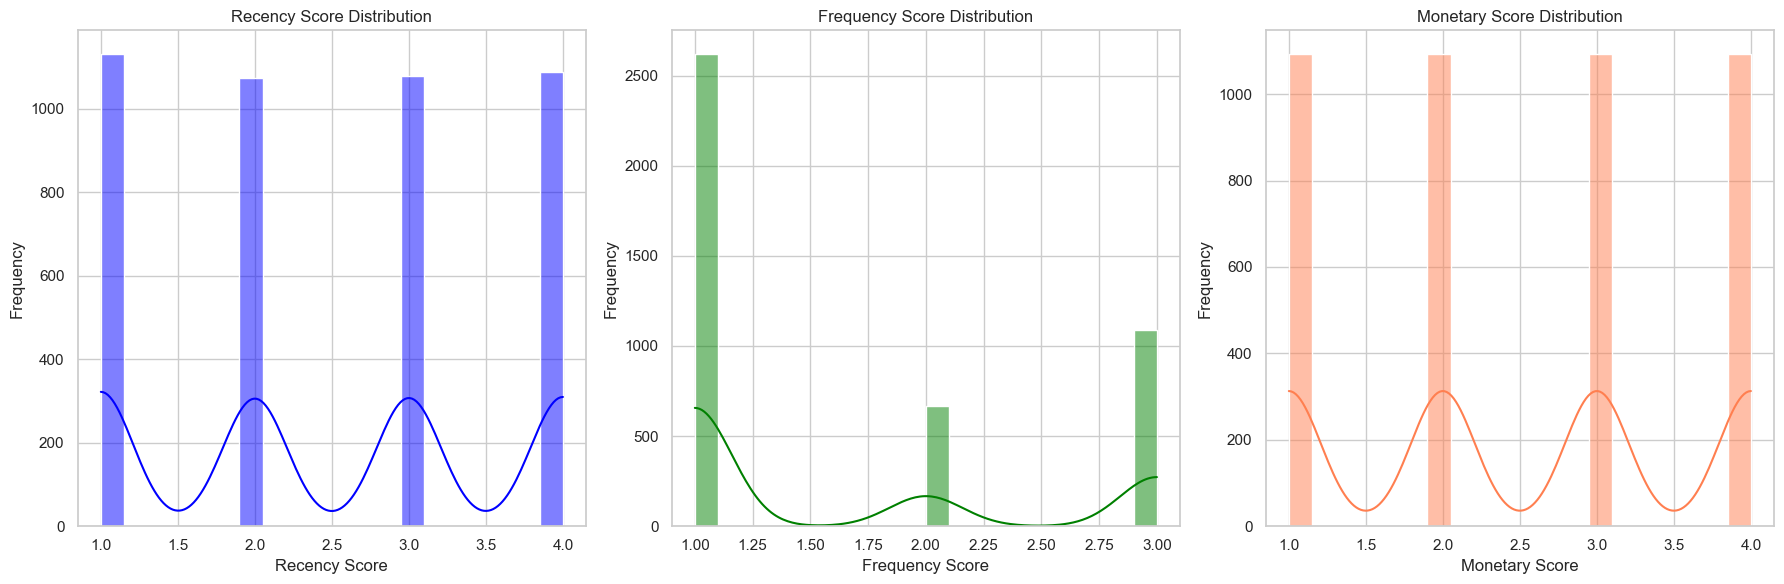

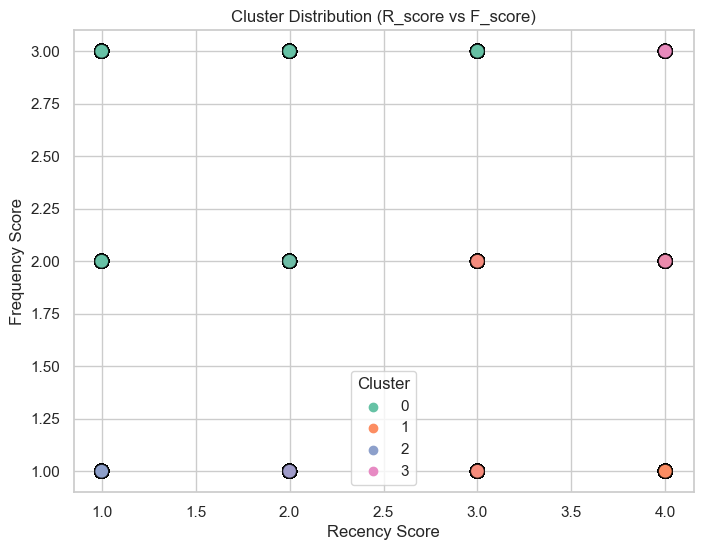

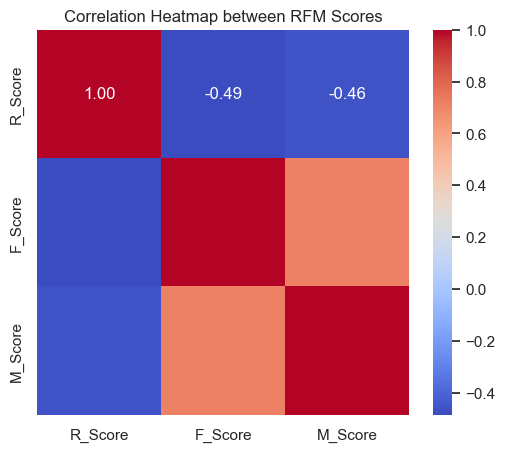

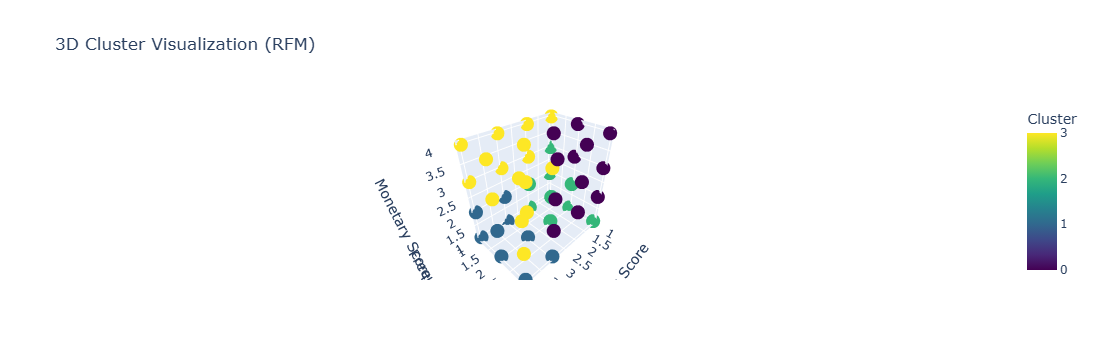

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px



# Set up the plot style
sns.set(style="whitegrid")

# Plotting histograms for RFM distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(rfm_scores['R_Score'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Recency Score Distribution')
axes[0].set_xlabel('Recency Score')
axes[0].set_ylabel('Frequency')

sns.histplot(rfm_scores['F_Score'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title('Frequency Score Distribution')
axes[1].set_xlabel('Frequency Score')
axes[1].set_ylabel('Frequency')

sns.histplot(rfm_scores['M_Score'], bins=20, kde=True, color='coral', ax=axes[2])
axes[2].set_title('Monetary Score Distribution')
axes[2].set_xlabel('Monetary Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Scatter plot of RFM scores with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm_scores, x='R_Score', y='F_Score', hue='Cluster', palette='Set2', s=100, alpha=0.7, edgecolor='black')
plt.title('Cluster Distribution (R_score vs F_score)')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.legend(title='Cluster')
plt.show()



# Calculate correlation matrix for RFM scores
correlation_matrix = rfm_scores[['R_Score', 'F_Score', 'M_Score']].corr()

# Create a heatmap to visualize the correlation between RFM scores
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap between RFM Scores')
plt.show()


# 3D Scatter Plot for RFM Clusters
fig = px.scatter_3d(rfm_scores, x='R_Score', y='F_Score', z='M_Score', color='Cluster',
                    labels={'R_Score': 'Recency Score', 'F_Score': 'Frequency Score', 'M_Score': 'Monetary Score'},
                    title="3D Cluster Visualization (RFM)",
                    color_continuous_scale='Viridis')
fig.show()


#### 4. Time Analysis 

#### This code snippet retrieves temporal information from the DataFrame's 'InvoiceDate' column. 'DayOfWeek' and 'HourOfDay,' two additional columns, are made to indicate the day of the week and the hour of the day, respectively. The relevant day names are entered into the 'DayOfWeek' column using the 'dt.day_name()' method, and the hour component is captured using 'dt.hour' in the 'HourOfDay' column. These extra temporal features are subsequently added to the data frame. Concise information about the Data Frame's structure is displayed using the 'info()' method, which also verifies that the newly added columns have the right data types. By providing insightful information about the temporal trends in customer transactions, this enrichment improves the dataset for further analysis.

#### Q. 1 Is there a specific day of the week or time of day when most orders are placed?

#### This code analyzes and visualizes the number of orders based on the day of the week and the hour of the day. It first extracts the day and hour from the InvoiceDate column. Then, it calculates the total number of orders for each day and hour using the value_counts() method. Two bar charts are created: one showing the distribution of orders across the days of the week and another for orders by hour. These visualizations help identify peak shopping days and times, which can guide marketing strategies and operational decisions, like staffing or promotions.

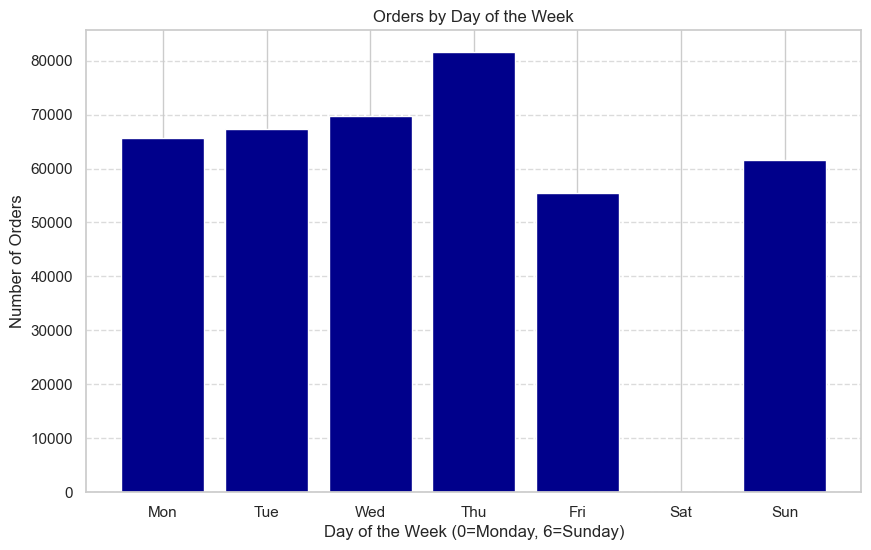

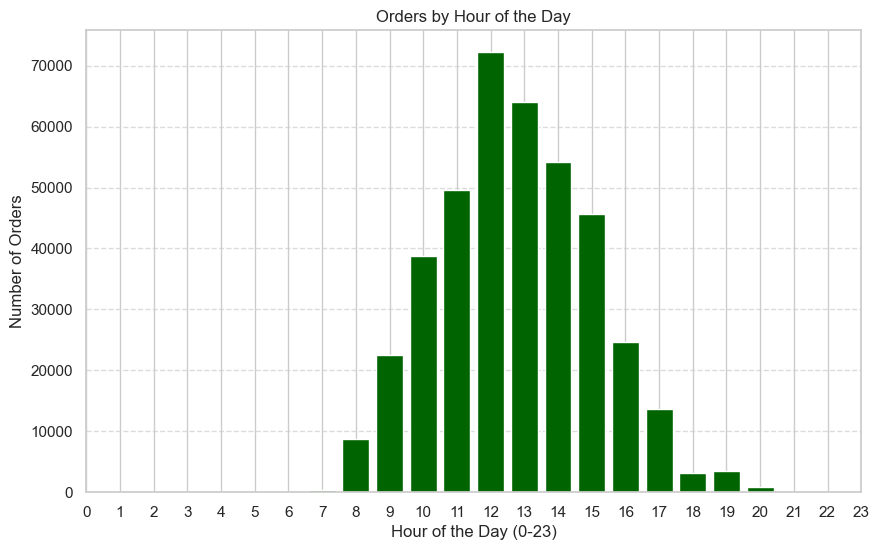

In [318]:
#Time Analysis

import matplotlib.pyplot as plt

# 1. Day of the Week or Time of Day Analysis
# Extract day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
# Extract hour of the day (0-23)
df['HourOfDay'] = df['InvoiceDate'].dt.hour

# Orders by day of the week
orders_by_day = df['DayOfWeek'].value_counts().sort_index()

# Orders by hour of the day
orders_by_hour = df['HourOfDay'].value_counts().sort_index()

# Plotting Orders by Day of the Week
plt.figure(figsize=(10, 6))
plt.bar(orders_by_day.index, orders_by_day.values, color='darkblue')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting Orders by Hour of the Day
plt.figure(figsize=(10, 6))
plt.bar(orders_by_hour.index, orders_by_hour.values, color='darkgreen')
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24, 1))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()



#### Are there any seasonal trends in the dataset?

#### This code analyzes and visualizes the number of orders based on the month of the year. It extracts the month from the InvoiceDate column and calculates the total number of orders for each month using the value_counts() method. A line chart is then created to show the seasonal trends of orders across the months. The chart helps to identify periods with higher or lower sales, revealing seasonal patterns or trends in customer activity. This information is valuable for adjusting marketing campaigns, inventory management, and sales strategies during peak or off-peak months.

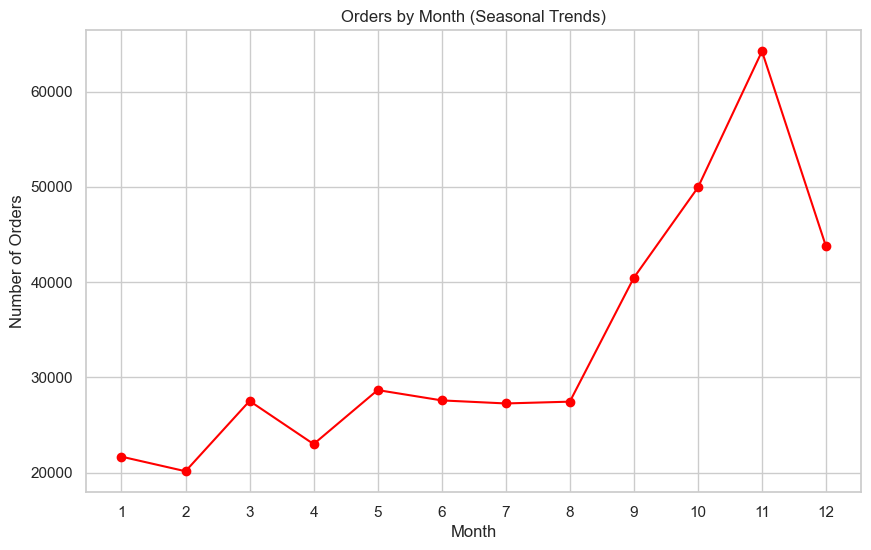

In [321]:
# 2. Seasonal Trends Analysis (Month-based analysis)
df['Month'] = df['InvoiceDate'].dt.month
orders_by_month = df['Month'].value_counts().sort_index()

# Plotting Seasonal Trends
plt.figure(figsize=(10, 6))
plt.plot(orders_by_month.index, orders_by_month.values, marker='o', color='red')
plt.title('Orders by Month (Seasonal Trends)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

### 5. Geographical Analysis

#### This code is analyzing the orders data to identify the top 5 countries with the highest number of orders. It first counts the orders for each country using the value_counts() method and selects the top 5 countries. These countries are then displayed in a bar chart, with the x-axis representing the countries and the y-axis representing the number of orders. The chart helps in visualizing the geographical distribution of sales, highlighting which countries are the strongest markets for the business. This information can be used to target marketing efforts, optimize logistics, or focus on areas with higher demand.

Top 5 Countries with the Highest Number of Orders:
Country
United Kingdom    356728
Germany             9480
France              8475
EIRE                7475
Spain               2528
Name: count, dtype: int64


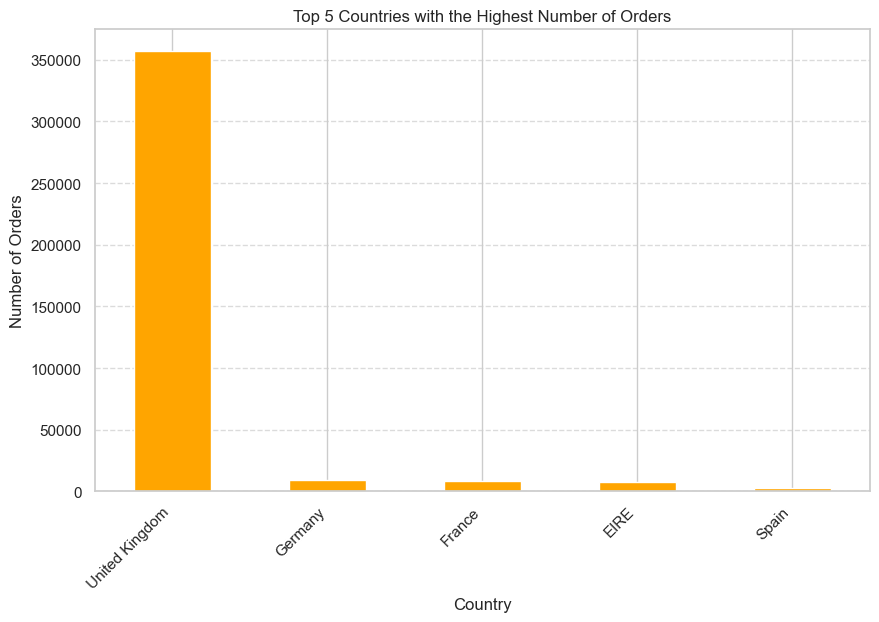

In [324]:
#Geographical Analysis

from sklearn.preprocessing import LabelEncoder

# 1. Top 5 Countries with the Highest Number of Orders
orders_by_country = df['Country'].value_counts().head(5)

# Print the top 5 countries with the highest number of orders
print("Top 5 Countries with the Highest Number of Orders:")
print(orders_by_country)

# Plotting the top 5 countries with the highest number of orders
plt.figure(figsize=(10, 6))
orders_by_country.plot(kind='bar', color='orange')
plt.title('Top 5 Countries with the Highest Number of Orders')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()



#### The code calculates the Average Order Value (AOV) for each country and visualizes the data with a bar chart. It then checks if there is any correlation between a country and its AOV using LabelEncoder to convert categorical country data into numeric form, followed by calculating the correlation coefficient. A positive or negative correlation value indicates the strength and direction of the relationship between the two variables


Average Order Value (AOV) by Country:
Country
Australia               1985.648841
Austria                  534.437895
Bahrain                  274.200000
Belgium                  343.789580
Brazil                  1143.600000
Canada                   611.063333
Channel Islands          608.375455
Cyprus                   642.938000
Czech Republic           141.544000
Denmark                  893.720952
EIRE                     783.704639
European Community       258.350000
Finland                  465.140417
France                   429.314520
Germany                  367.345721
Greece                   785.086667
Iceland                  615.714286
Israel                  1164.733333
Italy                    307.100182
Japan                   1262.165000
Lebanon                 1693.880000
Lithuania                415.265000
Malta                    250.547000
Netherlands             2818.431089
Norway                   879.086500
Poland                   300.547500
Portugal         

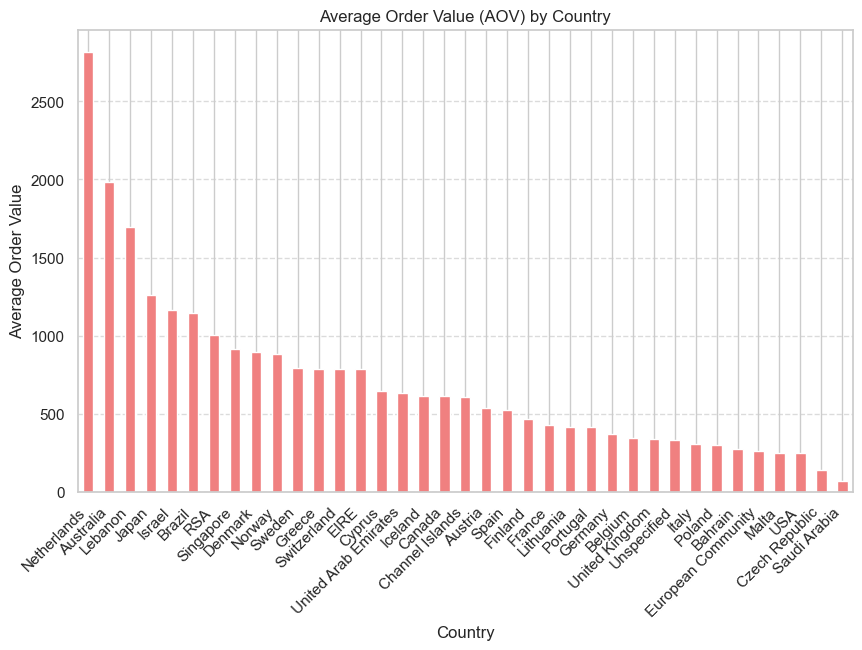


Correlation between Country and Average Order Value (AOV): -0.07873690571956293


In [328]:
# 2. Correlation Between Customer's Country and Average Order Value (AOV)

# Calculate total order value per country (assuming 'TotalPrice' is already computed as price * quantity)
aov_by_country = df.groupby('Country')['TotalPrice'].sum() / df.groupby('Country')['InvoiceNo'].nunique()

# Display the average order value for each country
print("\nAverage Order Value (AOV) by Country:")
print(aov_by_country)

#plot AOV by country
plt.figure(figsize=(10, 6))
aov_by_country.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Average Order Value (AOV) by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Correlation Check between Country and AOV using LabelEncoder
# Encode countries as numerical values using LabelEncoder
label_encoder = LabelEncoder()
df['CountryEncoded'] = label_encoder.fit_transform(df['Country'])

# Now, calculate the AOV by country (as a separate series)
aov_by_country = df.groupby('Country')['TotalPrice'].sum() / df.groupby('Country')['InvoiceNo'].nunique()

# Merge AOV with the encoded countries
aov_with_country = pd.DataFrame({
    'CountryEncoded': df.groupby('Country')['CountryEncoded'].first(),  # Take the first encoded value per country
    'AOV': aov_by_country
})

# Now compute the correlation between encoded country and AOV
correlation = aov_with_country['AOV'].corr(aov_with_country['CountryEncoded'])

print(f"\nCorrelation between Country and Average Order Value (AOV): {correlation}")


### 8. Returns and Refunds

#### This code categorizes products into specific types like gifts, apparel, and electronics based on their descriptions. It then filters out the orders that were returned or refunded and calculates the return rate for each product category (i.e., how often products are returned). The return rate is displayed in a bar chart, making it easy to compare categories. Additionally, the overall percentage of orders with returns is calculated and visualized in a pie chart, showing how many orders resulted in returns or refunds. This analysis helps understand which product categories are most prone to returns.


Return rate by product category:
                 return_rate
ProductCategory             
Books                  100.0
Gifts                  100.0
Other                  100.0


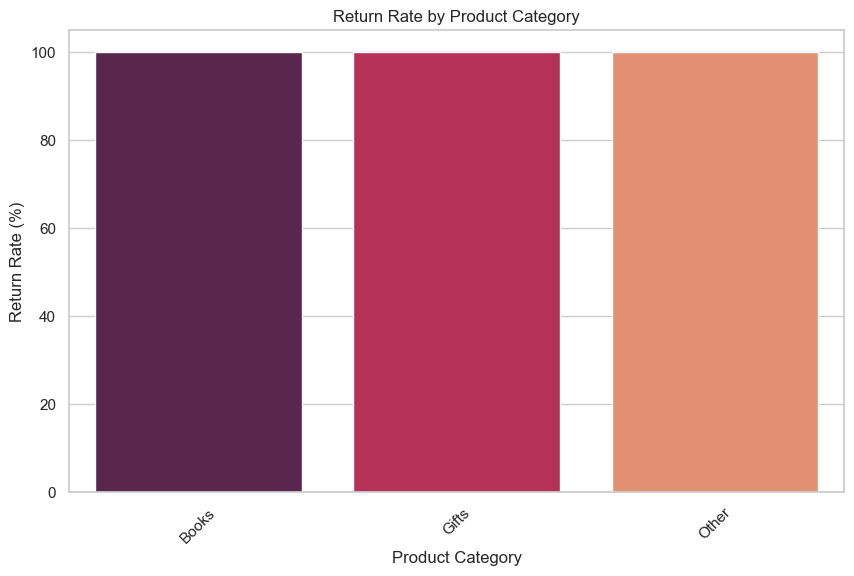


Percentage of orders with returns or refunds: 16.47%


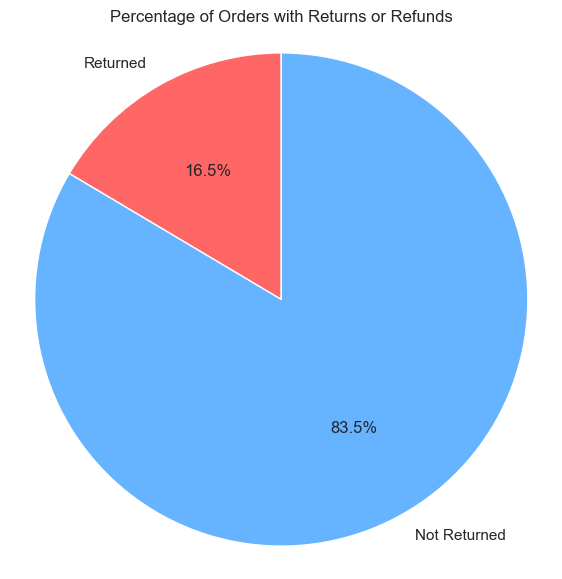

In [341]:
#Returns and Refunds

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Define the categorize_product function to handle NaN or non-string values
def categorize_product(description):
    # Ensure the description is a string and handle NaN values
    description = str(description).lower()
    
    if 'gift' in description:
        return 'Gifts'
    elif 'shirt' in description:
        return 'Apparel'
    elif 'book' in description:
        return 'Books'
    elif 'electronic' in description:
        return 'Electronics'
    else:
        return 'Other'

# Step 2: Apply the categorization function to the 'Description' column
df['ProductCategory'] = df['Description'].apply(categorize_product)

# Step 3: Filter the DataFrame to only include rows with returns (negative quantities)
df_returns = df[df['Quantity'] < 0]

# Step 4: Calculate the total returns and total orders per product category
category_returns = df_returns.groupby('ProductCategory').agg(
    total_returns=('InvoiceNo', 'nunique'),
    total_orders=('InvoiceNo', 'nunique')
)

# Step 5: Calculate the return rate for each category (percentage of returns)
category_returns['return_rate'] = (category_returns['total_returns'] / category_returns['total_orders']) * 100

# Step 6: Display the return rate by product category
print("\nReturn rate by product category:")
print(category_returns[['return_rate']])

# Step 7: Visualization of return rate by category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_returns.index, y=category_returns['return_rate'], palette='rocket')
plt.title('Return Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Step 8: Calculate the percentage of orders that have experienced returns or refunds
total_orders = df['InvoiceNo'].nunique()
total_returns = df_returns['InvoiceNo'].nunique()

return_percentage = (total_returns / total_orders) * 100

print(f"\nPercentage of orders with returns or refunds: {return_percentage:.2f}%")

#visualizing the overall return percentage as a pie chart
labels = ['Returned', 'Not Returned']
sizes = [total_returns, total_orders - total_returns]
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff6666', '#66b3ff'])
plt.title('Percentage of Orders with Returns or Refunds')
plt.axis('equal')
plt.show()


### 9. Profitability Analysis

#### This code helps to assess the profitability of products by calculating their profit margin. First, it computes the profit for each transaction based on a 40% margin. Then, it calculates the total profit generated by the company. For each product, the profit margin is calculated as the percentage of profit relative to total revenue. The top 5 products with the highest profit margins are identified and displayed. Finally, a bar chart is generated to visualize which products bring in the most profit relative to their sales. This analysis helps the business focus on high-margin products for better profitability.

Total Profit Generated by the Company: $3311407.77

Top 5 Products with the Highest Profit Margins:
                                 total_profit  profit_margin
Description                                                 
SET OF 3 BABUSHKA STACKING TINS        25.440           40.0
FLOWER FAIRY INCENSE BOUQUET           12.940           40.0
GLASS CHALICE GREEN  LARGE            117.984           40.0
MOP PENDANT SHELL NECKLACE             17.820           40.0
CAST IRON HOOK GARDEN FORK            548.572           40.0


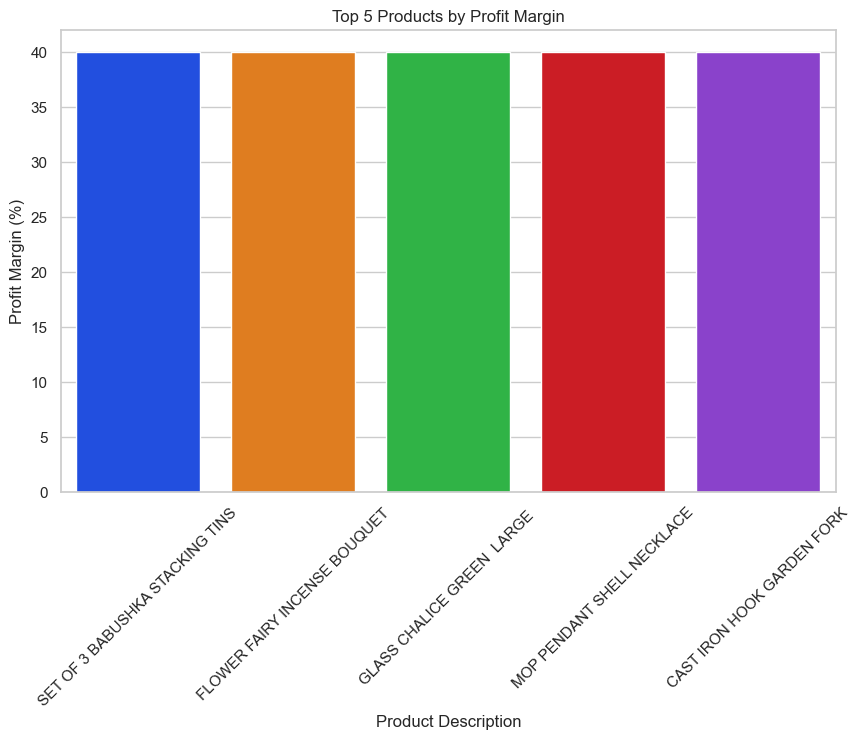

In [339]:


#Profitability Analysis

import pandas as pd


# Step 1: Calculate the Profit for each transaction
# If we assume that the cost is some percentage of the 'UnitPrice', for example, 60% of the UnitPrice is the cost, 
# we can compute profit by subtracting the cost from the revenue (TotalPrice = UnitPrice * Quantity).
profit_margin_percentage = 0.4  # Example: 40% profit margin, so 60% of UnitPrice is cost
df['Profit'] = df['TotalPrice'] * profit_margin_percentage

# Step 2: Calculate total profit over all transactions
total_profit = df['Profit'].sum()
print(f"Total Profit Generated by the Company: ${total_profit:.2f}")

# Step 3: Calculate the profit margin for each product
# Group by 'Description' (or 'StockCode' if you have it) to calculate the total profit for each product
product_profit = df.groupby('Description').agg(
    total_profit=('Profit', 'sum'),
    total_revenue=('TotalPrice', 'sum')
)

# Calculate profit margin for each product
product_profit['profit_margin'] = (product_profit['total_profit'] / product_profit['total_revenue']) * 100

# Step 4: Get top 5 products by profit margin
top_5_products = product_profit.sort_values(by='profit_margin', ascending=False).head(5)

print("\nTop 5 Products with the Highest Profit Margins:")
print(top_5_products[['total_profit', 'profit_margin']])

# Step 5: Visualization of the top 5 products by profit margin
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_products.index, y=top_5_products['profit_margin'], palette='bright')
plt.title('Top 5 Products by Profit Margin')
plt.xlabel('Product Description')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

# **CONCLUSION**

#### In conclusion, the collection of Python scripts provides an extensive analysis of customer data. Starting with data importation and preparation, the scripts progress into exploratory data analysis, offering valuable insights into payment methods, order volumes, and regional order patterns. Time-related analysis highlights key trends like average processing times and seasonal fluctuations. RFM analysis, customer segmentation, and visualizations, including scatter plots and 3D charts, provide a detailed look into customer behavior. Additionally, the analysis of customer activity duration and product profitability, along with sentiment analysis, adds further depth to the findings. Together, these insights give businesses actionable information for making informed decisions in marketing, customer engagement, and product management. The visualizations help clarify complex trends and support effective communication of the results.